In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = "data/Crop_recommendation.csv"
df = pd.read_csv(data_path)
print(df)

sns.set_style("darkgrid")

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


Datafields:

- N: ratio of Nitrogen contained in soil
- P: ratio of Phosphorous content in soil
- K: ratio of Potassium content in soil
- temperature: temperature in degree Celsius
- humidity: relative humidity in %
- ph: ph value of the soil
- rainfall: rainfall in mm
    
Context: This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

source: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset?resource=download

In [4]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
df.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

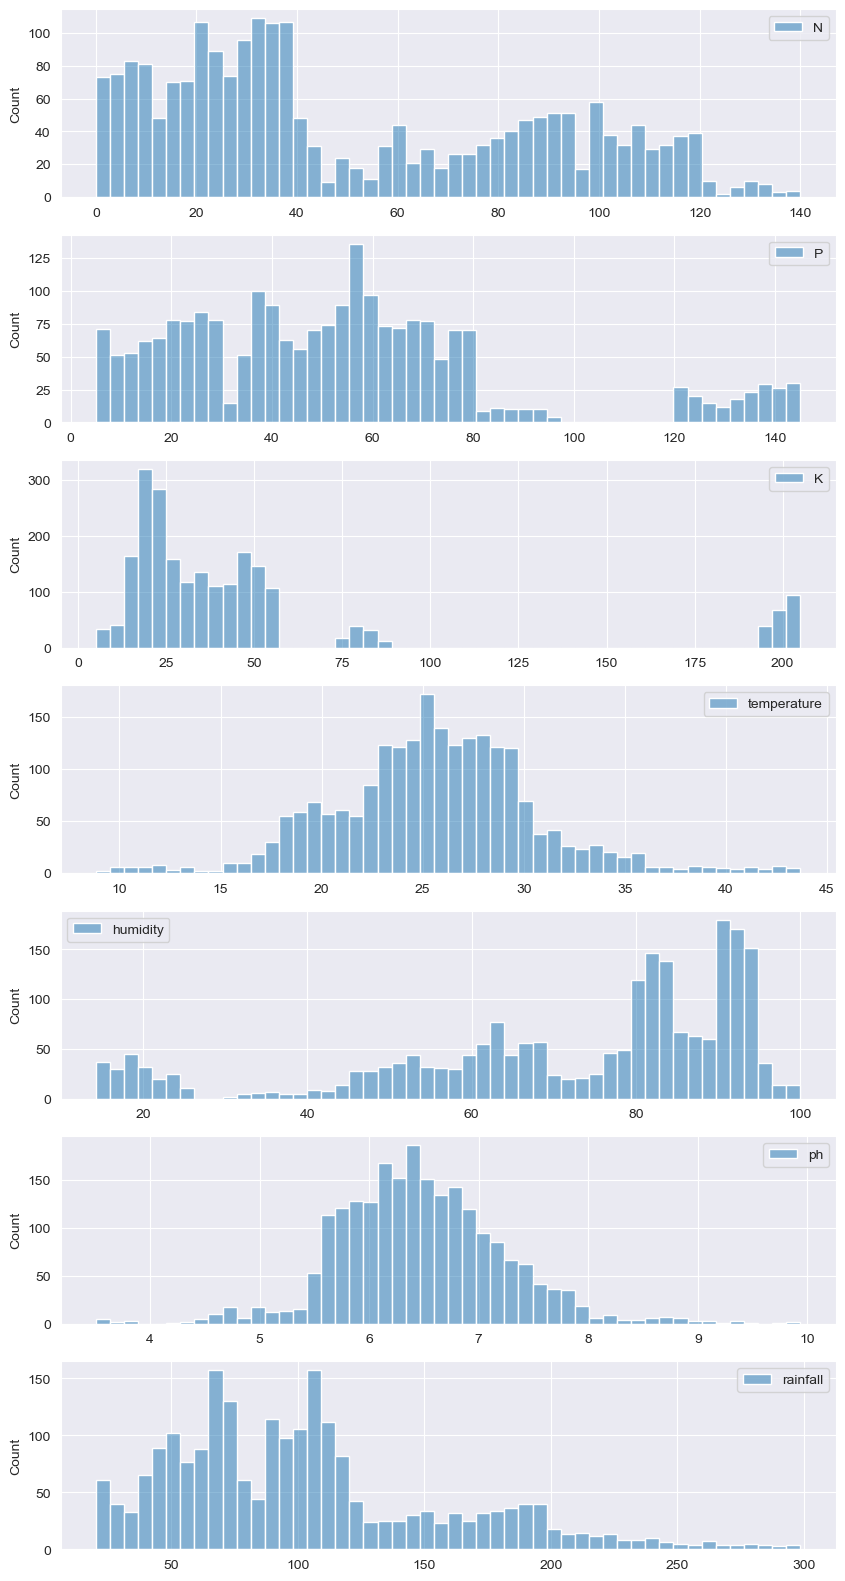

In [7]:
crop = ['rice']
crop = (df['label'].unique())

crop_df = df.loc[df['label'].isin(crop)].drop(columns=['label'])

fig, ax = plt.subplots(7, figsize=(10,20))

for idx, col in enumerate(crop_df.columns):
    sns.histplot(ax=ax[idx], data=crop_df[[col]], bins=50)
    

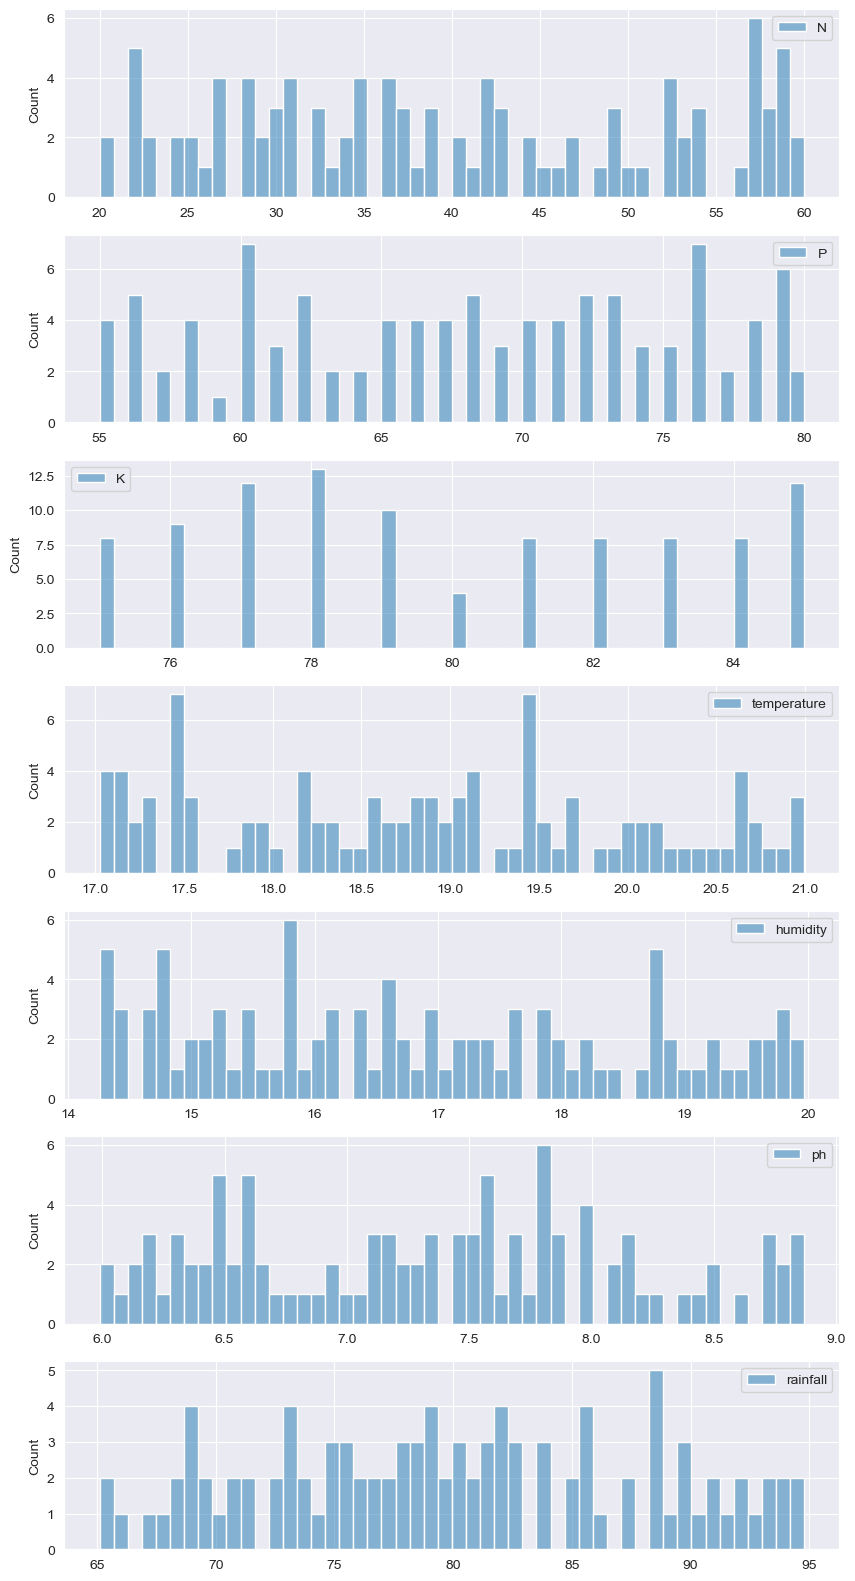

In [10]:
crop = 'chickpea'

crop_df = df.loc[df['label'] == crop].drop(columns=['label'])

fig, ax = plt.subplots(7, figsize=(10,20))

for idx, col in enumerate(crop_df.columns):
    sns.histplot(ax=ax[idx], data=crop_df[[col]], bins=50)

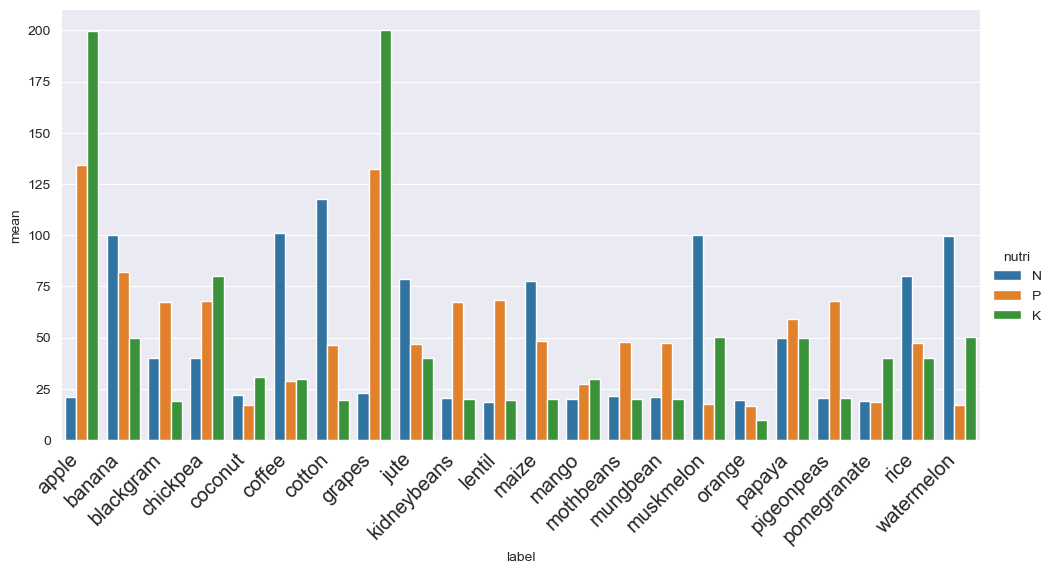

In [8]:
crop_npk = df.groupby(['label'])[['N', 'P', 'K']].agg('mean')
crop_npk[crop_npk.index.name] = crop_npk.index

crop_npk = pd.melt(crop_npk, id_vars="label", var_name="nutri", value_name="mean")

chart = sns.catplot( data=crop_npk, kind='bar', x='label', y='mean', hue='nutri', height=5, aspect=2, ) 

loc, labels = plt.xticks()
chart.set_xticklabels(labels, rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

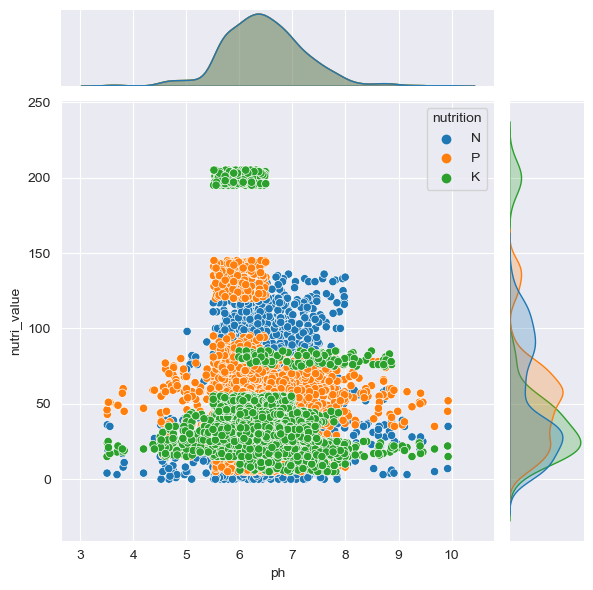

In [9]:
npk_ph = pd.melt(df.drop(columns=['temperature', 'humidity', 'rainfall', 'label']), 
                 id_vars=['ph'], 
                 var_name="nutrition", 
                 value_name="nutri_value")
npk_ph

sns.jointplot(data=npk_ph, x="ph", y="nutri_value", hue="nutrition")

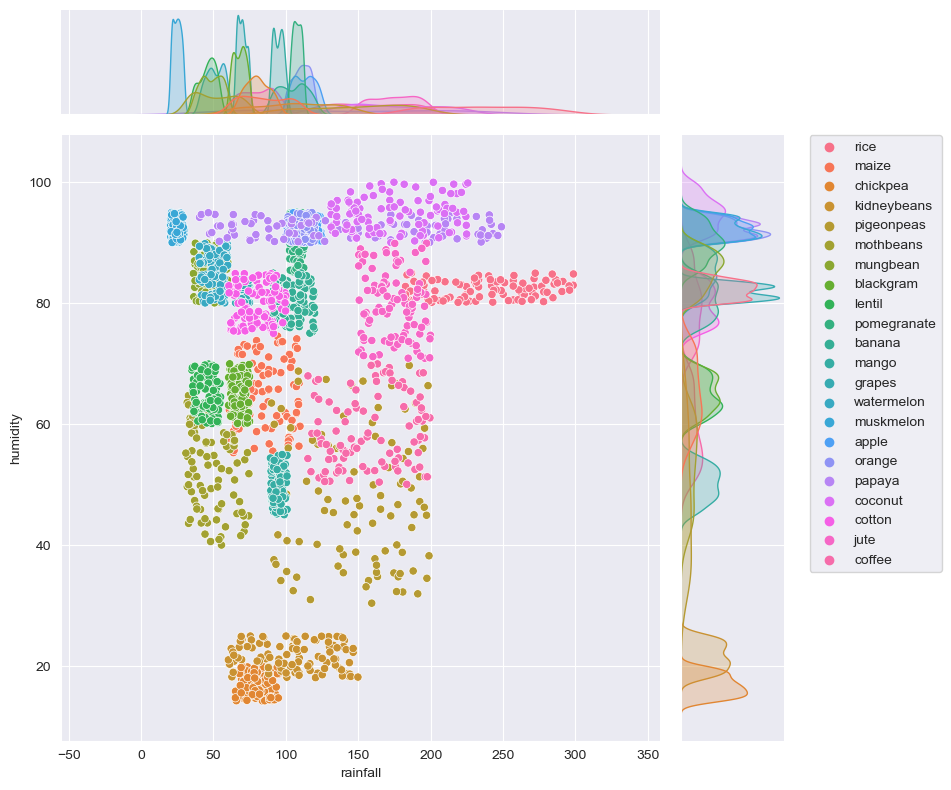

In [10]:
ax = sns.jointplot(data=df, x="rainfall", y="humidity", hue="label", height=8)

plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.)

<AxesSubplot:>

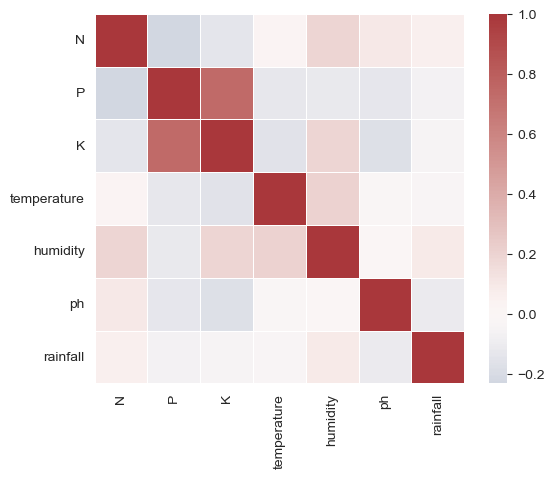

In [11]:
corr = df.corr()

cmap = sns.color_palette("vlag", as_cmap=True)

sns.heatmap(data=corr,
            square=True, 
            cmap=cmap,
            center=0,
            linewidths=.5,)

[[-0.30219096  0.64378667  0.62260719 -0.21242839 -0.06848339 -0.22694272
  -0.07253163]
 [-0.33410693 -0.03435809 -0.2838292  -0.35948683 -0.73791663  0.22065738
  -0.290158  ]
 [-0.11204501 -0.10993913 -0.1631733  -0.24822796 -0.21359908 -0.54852029
   0.73526701]
 [-0.54165059 -0.04629318 -0.15486709  0.69082649 -0.0671714  -0.39570047
  -0.20531846]
 [-0.50778466  0.08233115  0.03342452  0.15486542  0.12887133  0.65188053
   0.51838188]
 [-0.48290443 -0.376847   -0.02896707 -0.50041798  0.54787098 -0.12571195
  -0.23992979]
 [-0.00847289 -0.64910438  0.69226847  0.11128162 -0.28962403  0.04002786
   0.03857686]]


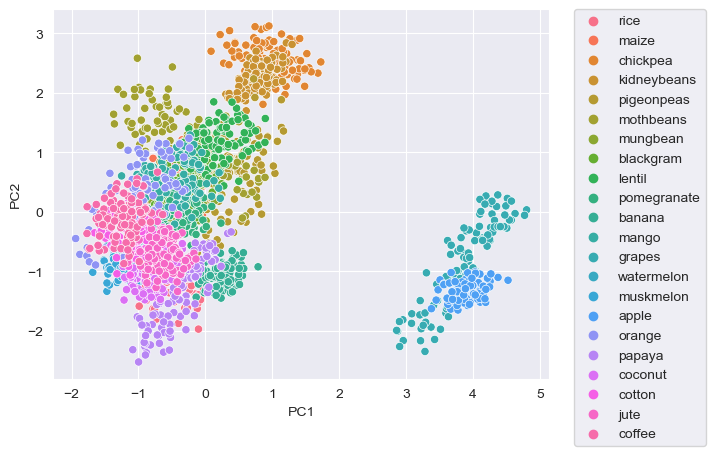

In [12]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA

var = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df_std = StandardScaler().fit_transform(df[var])

pca = PCA(n_components=len(var)).fit(df_std)

print(pca.components_)

pca_df = pd.DataFrame(pca.transform(df_std), columns=['PC%i' % (i+1) for i in range(pca.n_components_)])
pca_df['label'] = df.label

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [13]:
comp = pd.DataFrame(pca.components_, )

comp

var_exp = pca.explained_variance_ratio_*100

print(var_exp)
print(comp)




[27.58883143 18.4844311  15.37870376 14.61273084 11.51326253  9.66516625
  2.7568741 ]
          0         1         2         3         4         5         6
0 -0.302191  0.643787  0.622607 -0.212428 -0.068483 -0.226943 -0.072532
1 -0.334107 -0.034358 -0.283829 -0.359487 -0.737917  0.220657 -0.290158
2 -0.112045 -0.109939 -0.163173 -0.248228 -0.213599 -0.548520  0.735267
3 -0.541651 -0.046293 -0.154867  0.690826 -0.067171 -0.395700 -0.205318
4 -0.507785  0.082331  0.033425  0.154865  0.128871  0.651881  0.518382
5 -0.482904 -0.376847 -0.028967 -0.500418  0.547871 -0.125712 -0.239930
6 -0.008473 -0.649104  0.692268  0.111282 -0.289624  0.040028  0.038577


Try to find the most picky plant for each feature.

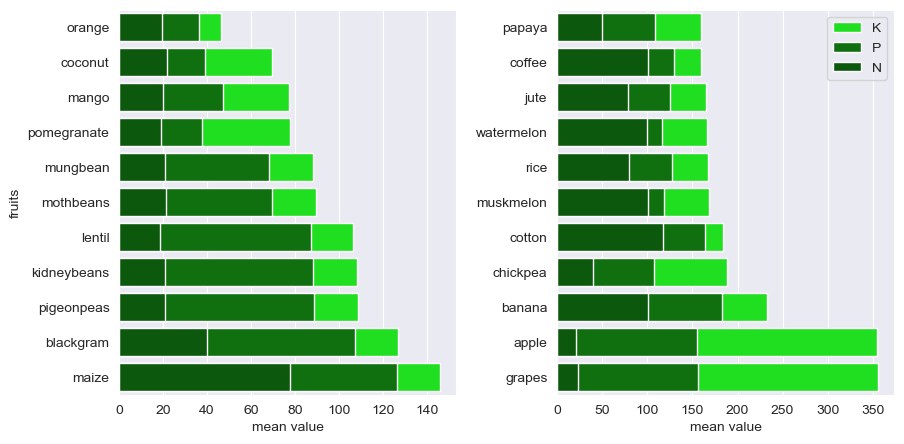

In [14]:
feature = ['N', 'P', 'K', ]

feature_df = df.groupby('label')[feature].agg(["mean",])
feature_df['sum_all'] = feature_df[[(f, 'mean') for f in feature]].sum(axis=1)
feature_df['sum_two'] = feature_df[[(f, 'mean') for f in feature[:-1]]].sum(axis=1)

feature_sorted = feature_df.sort_values('sum_all', ascending='False')
feature_sorted['label'] = feature_sorted.index

#print(feature_sorted.columns)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.subplots_adjust(hspace=0.525, wspace=0.3)

for idx, axis in enumerate(ax):
    sns.barplot(ax=axis,
               data=feature_sorted.iloc[(idx+0)*11:(idx+1)*11],
               y='label',
               x='sum_all',
               color='lime',
               label='K') 

    sns.barplot(ax=axis,
               data=feature_sorted.iloc[(idx+0)*11:(idx+1)*11],
               y='label',
               x='sum_two',
               color='green',
               label='P') 

    sns.barplot(ax=axis,
               data=feature_sorted.iloc[(idx+0)*11:(idx+1)*11],
               y='label',
               x=('N', 'mean'),
               color='darkgreen',
               label='N') 
    
    axis.set_xlabel('mean value')
    axis.set_ylabel('')
    
ax[0].set_ylabel('fruits')
ax[1].legend()


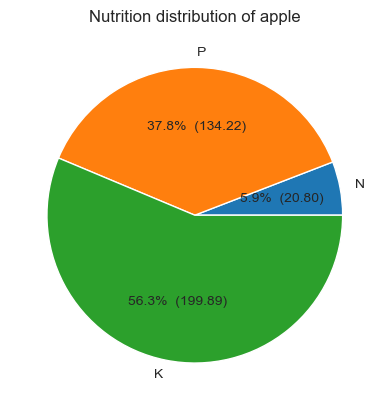

In [15]:
fruit = 'apple'

fruit_df = feature_df.loc[feature_df.index == fruit]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = pct*total/100.0
        return '{p:.1f}%  ({v:.2f})'.format(p=pct,v=val)
    return my_autopct

array = fruit_df[['N', 'P', 'K']].to_numpy().reshape((3))
plt.pie(array, labels=['N', 'P', 'K'], autopct=make_autopct(array))
Title = plt.title(f'Nutrition distribution of {fruit}')


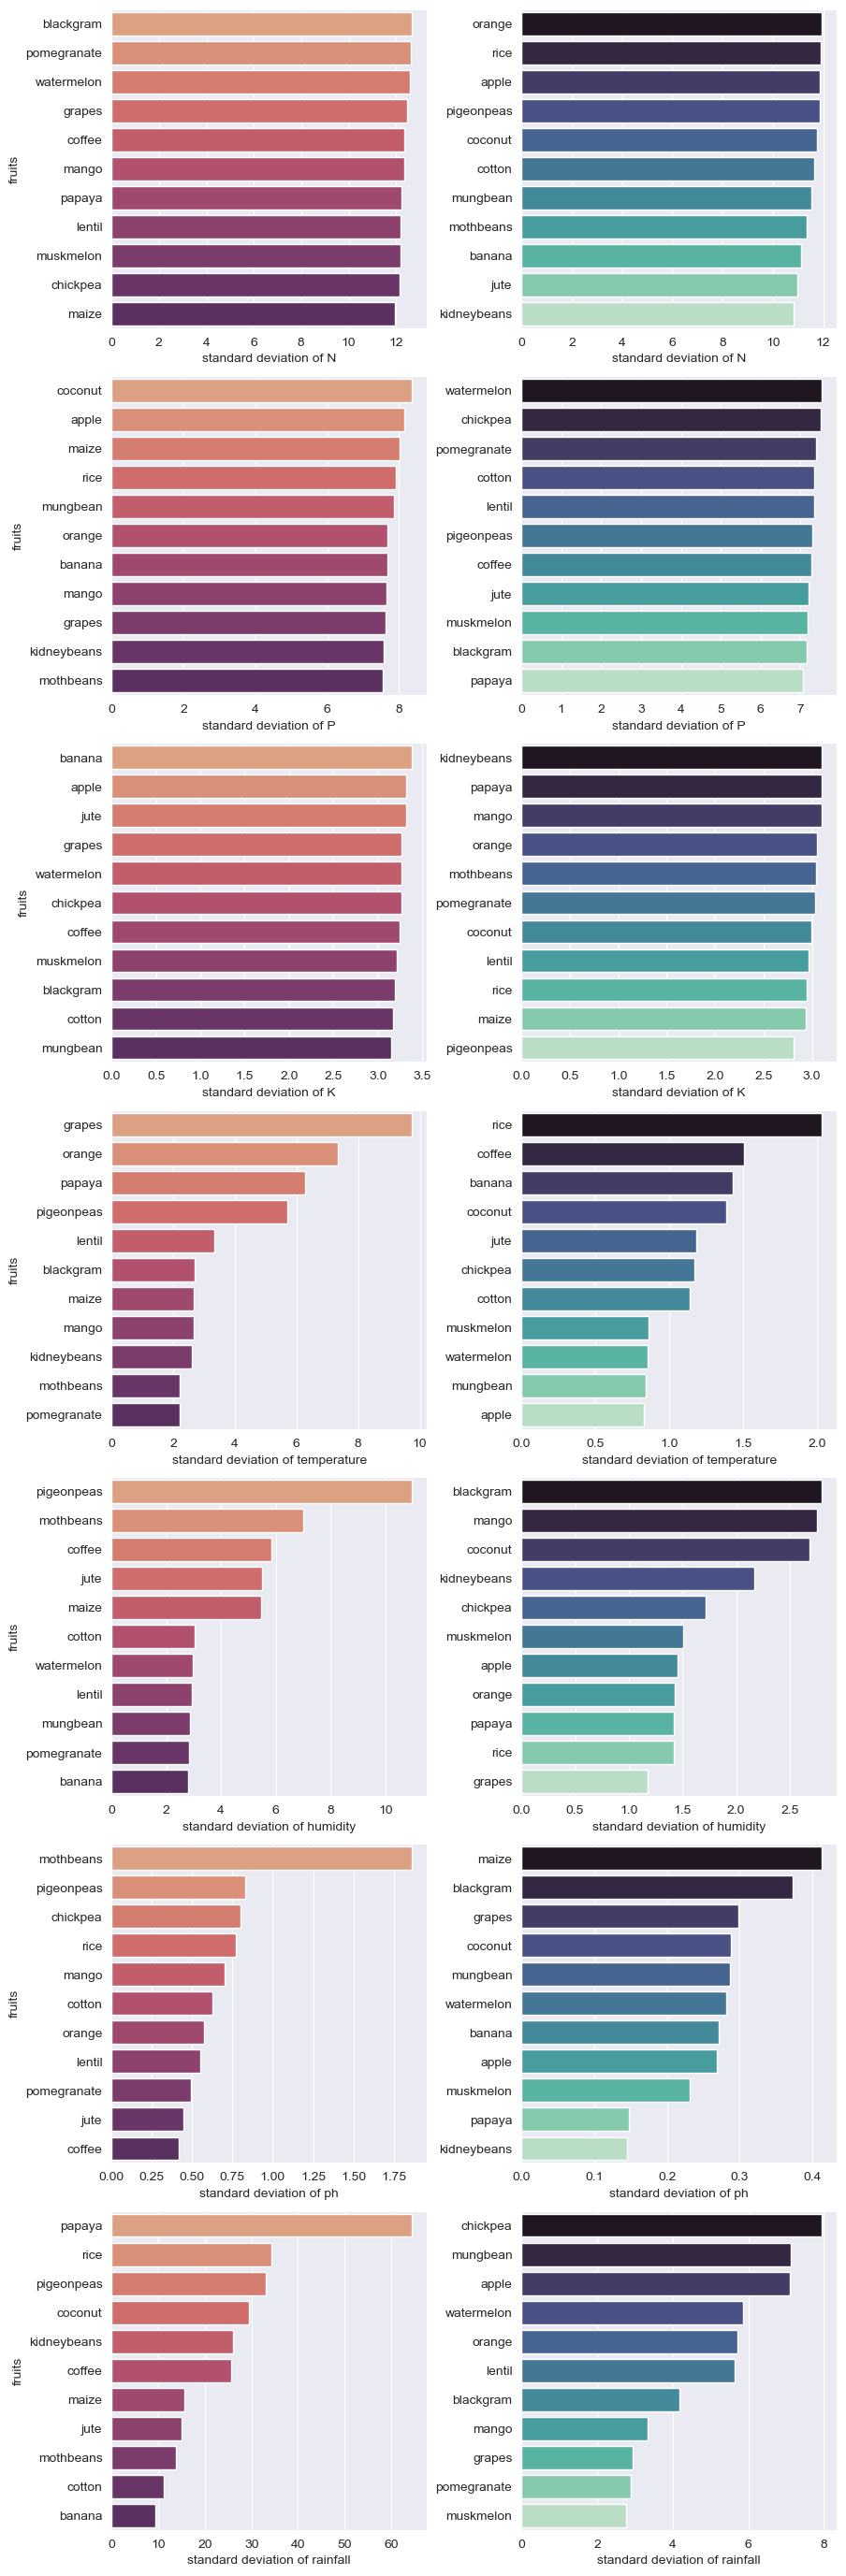

In [11]:
feature = [
           'N',
           'P',
           'K',
           'temperature',
           'humidity',
           'ph',
           'rainfall',
            ]

stds = {}
for fruit in df['label'].unique():
    fruit_df = df.loc[df['label'] == fruit].drop(columns=['label'])
    stds[fruit] = fruit_df.std()

fig, ax = plt.subplots(len(feature), 2, figsize=(10, len(feature)*5))
fig.subplots_adjust(hspace=0.15, wspace=0.3)

color = [sns.color_palette("flare", n_colors=11), sns.color_palette("mako", n_colors=11)]

for idx, feat in enumerate(feature):
    feat_df = pd.DataFrame({'fruit':[key for key in stds.keys()],
                           'std':[frame[feat] for frame in stds.values()]})
    
    sort = feat_df.sort_values('std', ascending=False)
    
    for jdx, axis in enumerate(ax[idx]):
        sns.barplot(data=sort[jdx*11:(jdx + 1)*11],
                   ax=axis,
                   x='std',
                   y='fruit',
                   palette=color[jdx]
                    )
    
        axis.set_xlabel(f'standard deviation of {feat}')
        axis.set_ylabel('')
    
    ax[idx][0].set_ylabel('fruits')


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

features = df.drop(columns='label')
labels = df['label']

trainX, testX, trainY, testY = train_test_split(features, labels, test_size = 0.2, shuffle=True, )

forest = RandomForestClassifier()
forest.fit(trainX, trainY)

predicted = forest.predict(testX)

score = metrics.accuracy_score(testY, predicted)

print("Accuracy is: ", score)

print(metrics.classification_report(testY, predicted))

Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        15
   blackgram       0.95      1.00      0.98        21
    chickpea       1.00      1.00      1.00        17
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        17
        jute       0.95      1.00      0.97        18
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        16
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.96      0.98        28
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        13
      orange       1.00      1.00      1.00     

In [18]:
freatures = df.drop(columns=['label', 'N', 'P', 'K', 'ph'])
labels = df.label

trainX, testX, trainY, testY = train_test_split(features, labels, test_size = 0.4, shuffle=True, )

forest = RandomForestClassifier()
forest.fit(trainX, trainY)

predicted = forest.predict(testX)

score = metrics.accuracy_score(testY, predicted)

print("Accuracy is: ", score)

print(metrics.classification_report(testY, predicted))

Accuracy is:  0.9943181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        45
   blackgram       1.00      1.00      1.00        48
    chickpea       1.00      1.00      1.00        40
     coconut       1.00      1.00      1.00        43
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        40
        jute       0.97      0.95      0.96        41
 kidneybeans       1.00      1.00      1.00        28
      lentil       0.97      1.00      0.99        36
       maize       1.00      0.97      0.99        35
       mango       1.00      1.00      1.00        42
   mothbeans       1.00      0.98      0.99        44
    mungbean       1.00      1.00      1.00        52
   muskmelon       1.00      1.00      1.00        37
      orange       1.00      1.00      1.00     